In [64]:
# IMPORTING LIBRARIES FOR STARTUP

import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.width',500)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: f"{x:.8f}")

In [65]:
# IMPORTING DATASET
df = pd.read_csv('MSFT.csv')

In [66]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.08854200,0.10156300,0.08854200,0.09722200,0.06143400,1031788800
1,1986-03-14,0.09722200,0.10243100,0.09722200,0.10069400,0.06362800,308160000
2,1986-03-17,0.10069400,0.10329900,0.10069400,0.10243100,0.06472500,133171200
3,1986-03-18,0.10243100,0.10329900,0.09895800,0.09982600,0.06307900,67766400
4,1986-03-19,0.09982600,0.10069400,0.09722200,0.09809000,0.06198200,47894400


In [67]:
# DATA ANALYSIS
df.describe([0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95]).T
# mean > median: right skewed
# mean < median: left skewed

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
Open,9083.00000000,41.32493610,59.69690490,0.08854200,0.35937500,0.54027820,4.05078150,26.82000000,40.03499950,103.77399920,186.93499760,344.61999500
High,9083.00000000,41.76088690,60.27221826,0.09201400,0.36458300,0.55381900,4.10205100,27.10000000,40.44375050,105.03400260,188.81099670,349.67001300
Low,9083.00000000,40.87848843,59.08172796,0.08854200,0.35329900,0.52951400,4.02734400,26.52000000,39.50000000,102.32799800,184.39700130,342.20001200
Close,9083.00000000,41.33562759,59.71456679,0.09027800,0.35937500,0.54201420,4.07519500,26.84000000,39.93750000,103.82599900,187.27499870,343.10998500
Adj Close,9083.00000000,36.25612049,59.98143554,0.05704600,0.22708700,0.34249540,2.57508850,18.94853000,29.24481200,99.89915740,184.28812590,342.40200800
Volume,9083.00000000,58750553.83683805,38451997.55074235,2304000.00000000,19273440.00000000,23552540.00000000,34612300.00000000,52032000.00000000,72654000.00000000,98047160.00000000,121253529.99999996,1031788800.00000000


In [68]:
# LOOKING FOR NULL VALUES
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [69]:
# HYPOTESIS TEST FUNCTION

from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

def hypothesis_test(df, col1, col2): # treshold: 0.05
    print(df.columns)
    # Normallik testi
    print("############ NORMALITY TEST OF {} ############".format(col1))
    _, pvalue_col1 = shapiro(df[col1])
    print('{} p-value: {:.3f}'.format(col1, pvalue_col1))
    col1_normal = pvalue_col1 > 0.05
    
    if col1_normal:
        print('{} is normally distributed'.format(col1))
    else:
        print('{} is not normally distributed'.format(col1))

    print("############ NORMALITY TEST OF {} ############".format(col2))
    _, pvalue_col2 = shapiro(df[col2])
    print('{} p-value: {:.3f}'.format(col2, pvalue_col2))
    col2_normal = pvalue_col2 > 0.05
    
    if col2_normal:
        print('{} is normally distributed'.format(col2))
    else:
        print('{} is not normally distributed'.format(col2))
    
    # Varyans homojenliği testi
    print("############ VARIANCE HOMOGENEITY TEST ############")
    _, pvalue_variance = levene(df[col1], df[col2])
    print('p-value of Levene test: {:.3f}'.format(pvalue_variance))
    equal_variance = pvalue_variance > 0.05
    
    if equal_variance:
        print('Variances are equal')
    else:
        print('Variances are not equal')

    # Hipotez testi
    if not col1_normal or not col2_normal:
        print("############ MANN-WHITNEY U TEST ############")
        _, pvalue = mannwhitneyu(df[col1], df[col2])
        print('p-value of Mann-Whitney U non-parametric test: {:.3f}'.format(pvalue))
    elif col1_normal and col2_normal and not equal_variance:
        print("############ T-TEST with UNEQUAL VARIANCES ############")
        _, pvalue = ttest_ind(df[col1], df[col2], equal_var=False)
        print('p-value of t-test: {:.3f}'.format(pvalue))
    else:
        print("############ T-TEST ############")
        _, pvalue = ttest_ind(df[col1], df[col2], equal_var=True)
        print('p-value of t-test: {:.3f}'.format(pvalue))


In [70]:
hypothesis_test(df, "Open","Close")
# H0: "Open" ile "Close" değişkenleri arasında ist. ol. anlamlı bir farklılık yoktur.
# H1: ...vardır.
############ MANN-WHITNEY U TEST ############
# p-value of Mann-Whitney U non-parametric test: 0.988
# SONUÇ: H0 REDDEDİLEMEZ

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
############ NORMALITY TEST OF Open ############
Open p-value: 0.000
Open is not normally distributed
############ NORMALITY TEST OF Close ############
Close p-value: 0.000
Close is not normally distributed
############ VARIANCE HOMOGENEITY TEST ############
p-value of Levene test: 0.990
Variances are equal
############ MANN-WHITNEY U TEST ############
p-value of Mann-Whitney U non-parametric test: 0.988


In [71]:
hypothesis_test(df, "Close","Adj Close")
# H0: "Close" ile "Adj Close" arasında ist. olarak anlamlı bir fark yoktur
# H1: ...vardır
############ MANN-WHITNEY U TEST ############
# p-value of Mann-Whitney U non-parametric test: 0.000
# SONUÇ: H0 REDDEDİLİR.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
############ NORMALITY TEST OF Close ############
Close p-value: 0.000
Close is not normally distributed
############ NORMALITY TEST OF Adj Close ############
Adj Close p-value: 0.000
Adj Close is not normally distributed
############ VARIANCE HOMOGENEITY TEST ############
p-value of Levene test: 0.042
Variances are not equal
############ MANN-WHITNEY U TEST ############
p-value of Mann-Whitney U non-parametric test: 0.000


In [72]:
hypothesis_test(df, "High","Low")
# H0: "High" ile "Low" arasında ist. olarak anlamlı bir fark yoktur
# H1: ...vardır
############ MANN-WHITNEY U TEST ############
# p-value of Mann-Whitney U non-parametric test: 0.013
# SONUÇ: H0 REDDEDİLİR.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
############ NORMALITY TEST OF High ############
High p-value: 0.000
High is not normally distributed
############ NORMALITY TEST OF Low ############
Low p-value: 0.000
Low is not normally distributed
############ VARIANCE HOMOGENEITY TEST ############
p-value of Levene test: 0.438
Variances are equal
############ MANN-WHITNEY U TEST ############
p-value of Mann-Whitney U non-parametric test: 0.013


In [73]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [74]:
# GRAB COL NAMES FUNCTION 

def grab_col_names(dataframe: pd.DataFrame, cat_th=10, car_th=20):
    """

    :param dataframe:
        pandas.DataFrame object
    :param cat_th:
        default: 10
        integer
    :param car_th:
        default: 20
        integer
    :return:
        cat_cols, num_cols, cat_but_cardinal_cols
        list, list, list
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                   dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations (Gözlem Birimleri): {dataframe.shape[0]}")
    print(f"Variables (Değişkenler): {dataframe.shape[1]}")
    print(f"cat_cols (kategorik_değişkenler): {len(cat_cols)} - {cat_cols}")
    print(f"num_cols (numerik_değişkenler): {len(num_cols)} - {num_cols}")
    print(f"cat_but_car (kategorik_ama_kardinal): {len(cat_but_car)} - {cat_but_car}")
    print(f"num_but_cat (numerik_ama_kategorik): {len(num_but_cat)} - {num_but_cat}")

    return cat_cols, num_cols, cat_but_car

In [75]:
# GRABBING COLUMN NAMES FROM DATAFRAME

cat_cols, num_cols, _ = grab_col_names(df, cat_th=60)

Observations (Gözlem Birimleri): 9083
Variables (Değişkenler): 7
cat_cols (kategorik_değişkenler): 0 - []
num_cols (numerik_değişkenler): 6 - ['open', 'high', 'low', 'close', 'adj close', 'volume']
cat_but_car (kategorik_ama_kardinal): 1 - ['date']
num_but_cat (numerik_ama_kategorik): 0 - []


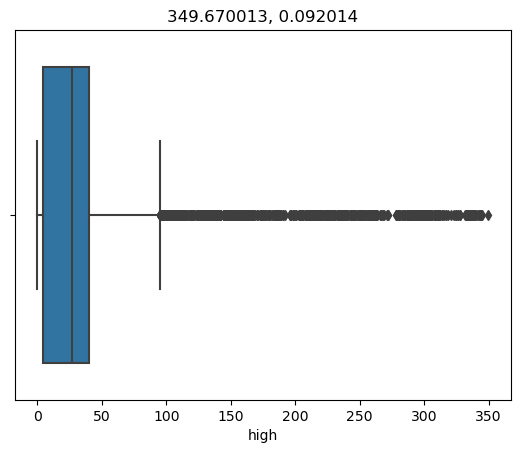

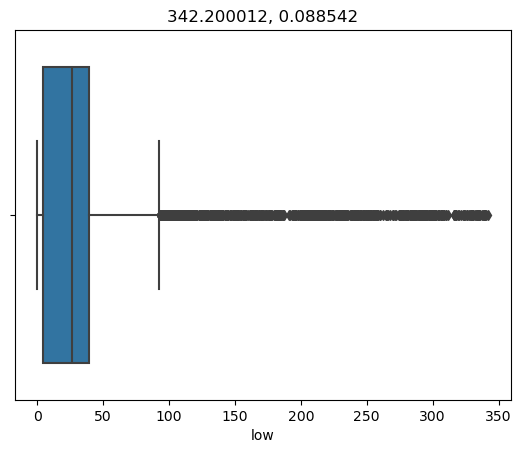

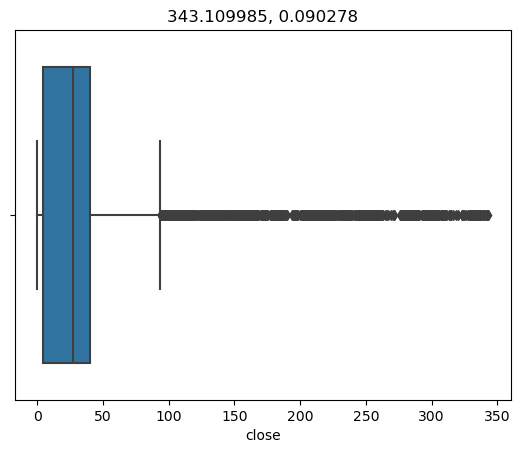

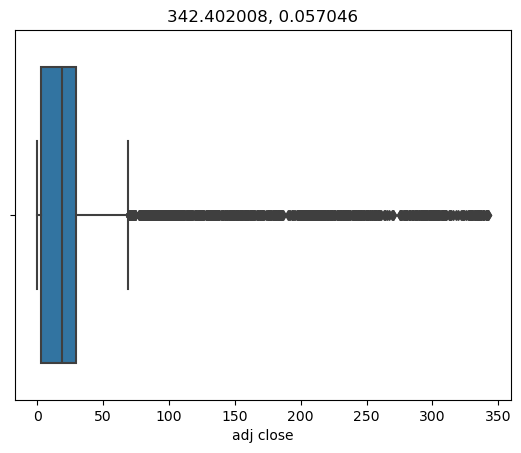

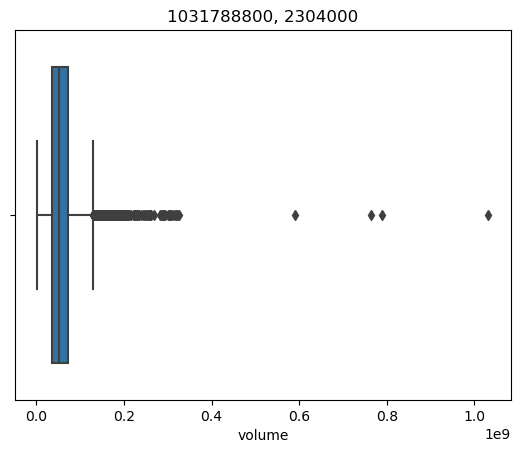

In [76]:
# OUTLIER ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols[1:7]:
    sns.boxplot(x=df[col])
    plt.title(f"{df[col].max()}, {df[col].min()}")
    plt.show()

In [77]:
# REMOVING OUTLIERS -NOT NECESSARY ANYMORE-

def detect_outliers(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_tresholds(dataframe:pd.DataFrame, col_name, q1=.25, q3=.75, remove=False):
    low_limit, up_limit = detect_outliers(dataframe, col_name, q1=q1, q3=q3)

    if remove:
        ups = dataframe.loc[dataframe[col_name] > up_limit, col_name]
        lows = dataframe.loc[dataframe[col_name] < low_limit, col_name] 
        dataframe.drop(ups.index, axis=0, inplace=True)
        dataframe.drop(lows.index, axis=0, inplace=True)
    else:
        dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit
        dataframe.loc[dataframe[col_name] < low_limit, col_name]  = low_limit

    return dataframe

dfinplace = df.copy()
#for col in num_cols[1:]:  
 #   dfinplace = replace_with_tresholds(dfinplace, col, q1=.25, q3=.75, remove=False)



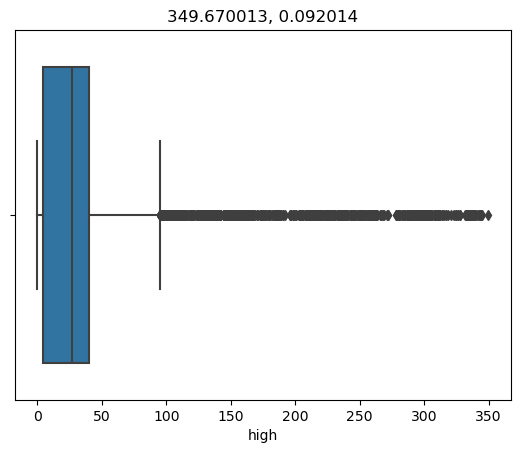

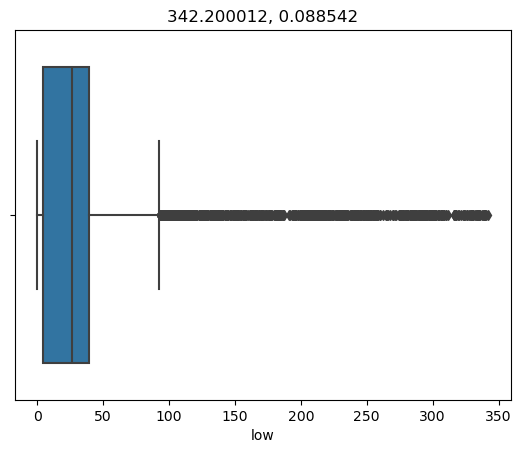

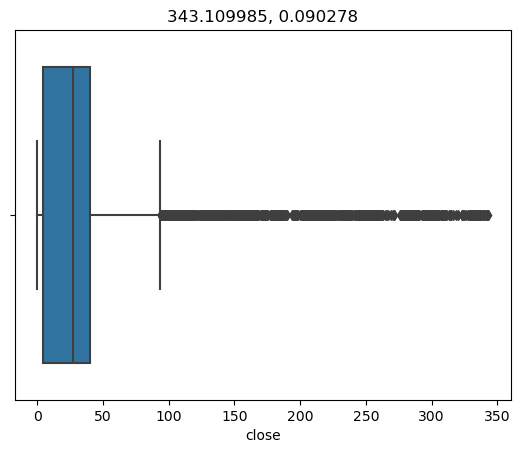

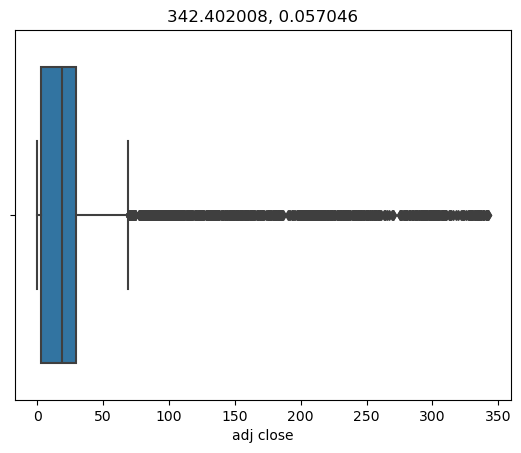

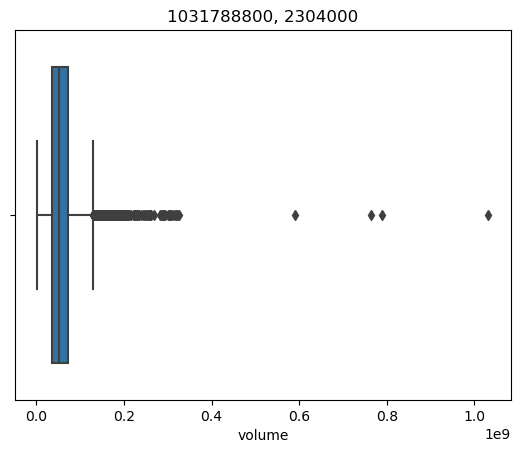

In [78]:
# AFTER REMOVING OUTLIERS

for col in num_cols[1:]:
    sns.boxplot(x=dfinplace[col])
    plt.title(f"{dfinplace[col].max()}, {dfinplace[col].min()}")
    plt.show()

In [79]:
# FEATURE ENGINEERING FOR TIME SERIES
import numpy as np
import pandas_ta as ta

dff = dfinplace.copy()
dff["date"] = pd.to_datetime(dff["date"])

def create_date_features(df: pd.DataFrame, dt_var: str):
    df['month'] = df[dt_var].dt.month
    df['day_of_month'] = df[dt_var].dt.day
    df['day_of_year'] = df[dt_var].dt.dayofyear
    df['week_of_year'] = df[dt_var].dt.isocalendar().week
    df['day_of_week'] = df[dt_var].dt.dayofweek
    df['is_wknd'] = df[dt_var].dt.weekday // 4
    df['is_month_start'] = df[dt_var].dt.is_month_start.astype(int)
    df['is_month_end'] = df[dt_var].dt.is_month_end.astype(int)
    return df

dff = create_date_features(dff, "date")

days = [1, 2, 4, 7, 14, 29, 56, 90, 150]
alphas = np.arange(0.1, 1.0, step=0.1)

diff_close_open = dff["close"] - dff["open"] 
dff["diff_close_open"] = diff_close_open

diff_high_low = dff["high"] - dff["low"]
dff["diff_high_low"] = diff_high_low

open_close_perc_change = diff_close_open / dff["open"] * 100
dff["open_close_perc_change"] = open_close_perc_change

dff["RSI"] = ta.rsi(dff.close, length=15)
dff["EMAF"] = ta.ema(dff.close, length=20)
dff["EMAM"] = ta.ema(dff.close, length=100)
dff["EMAS"] = ta.ema(dff.close, length=150)
macd = ta.macd(dff['close'], fast=12, slow=26, signal=9)
bbands = ta.bbands(dff['close'], length=20, std=2)
stoch = ta.stoch(dff['high'], dff['low'], dff['close'])
for col in macd.columns:
    dff[col] = macd[col]

for col in bbands.columns:
    dff[col] = bbands[col]

for col in stoch.columns:
    dff[col] = stoch[col]

dff['Williams_%R'] = ta.willr(dff['high'], dff['low'], dff['close'])

for alpha in alphas:
    dff[f"close_ewm_{alpha:.1f}".replace(".","")] = dff['close'].ewm(alpha=alpha).mean() # Exponential Moving Average with ALPHAS

yesterday =dff["close"].shift(1)
dff["yesterday"] = yesterday

tomorrow = dff["close"].shift(-1)
dff["tomorrow"] = tomorrow

# UNADDED VARIABLES
# psar = ta.psar(dff['high'], dff['low'], dff['close'])
#for col in psar.columns:
 #   dff[col] = psar[col].values
#for day in days:
 #   dff[f"close_shift_{day}"] = dff['close'].shift(day) # Day Lag
#for day in days:
 #   dff[f"close_rolling_{day}"] = dff['close'].rolling(window=day).mean() # Moving Average
#for day in days:
 #   dff[f"close_rolling_volatility_{day}"] = dff['close'].rolling(window=day).std() # Moving Volatility
# dff[f"volume_diff_{day}"] = dff['volume'].diff(day)
# dff[f"volume_rolling_{day}"] = dff['volume'].rolling(window=day).mean()
# dff[f"volume_rolling_volatility_{day}"] = dff['volume'].rolling(window=day).std()



In [80]:
# CHECKING NAN VALUES REMOVED

first_shape = dff.shape[0]
print("Before dropping NaN: ",first_shape)
dff.dropna(inplace=True)
last_shape = dff.shape[0]
print("After dropping NaN: ",last_shape)

Before dropping NaN:  9083
After dropping NaN:  8933


In [81]:
# CREATING CATEGORICAL AND NUMERICAL VARIABLES AND CUSTOMIZE THEM

cat_cols, num_cols, _ = grab_col_names(dff, cat_th=60)
cat_cols.append('day_of_year')
num_cols.pop(num_cols.index('day_of_year'))

Observations (Gözlem Birimleri): 8933
Variables (Değişkenler): 44
cat_cols (kategorik_değişkenler): 7 - ['month', 'day_of_month', 'week_of_year', 'day_of_week', 'is_wknd', 'is_month_start', 'is_month_end']
num_cols (numerik_değişkenler): 37 - ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'day_of_year', 'diff_close_open', 'diff_high_low', 'open_close_perc_change', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'Williams_%R', 'close_ewm_01', 'close_ewm_02', 'close_ewm_03', 'close_ewm_04', 'close_ewm_05', 'close_ewm_06', 'close_ewm_07', 'close_ewm_08', 'close_ewm_09', 'yesterday', 'tomorrow']
cat_but_car (kategorik_ama_kardinal): 0 - []
num_but_cat (numerik_ama_kategorik): 7 - ['month', 'day_of_month', 'week_of_year', 'day_of_week', 'is_wknd', 'is_month_start', 'is_month_end']


'day_of_year'

In [82]:
# NORMALIZING NUMERICAL VARIABLES
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
dfs = dff.copy()
for col in [col for col in num_cols if col not in ["date"]]:
    dfs[col] = scaler.fit_transform(dfs[[col]])

dfs.head()

,date,open,high,low,close,adj close,volume,month,day_of_month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,diff_close_open,diff_high_low,open_close_perc_change,RSI,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,STOCHk_14_3_3,STOCHd_14_3_3,Williams_%R,close_ewm_01,close_ewm_02,close_ewm_03,close_ewm_04,close_ewm_05,close_ewm_06,close_ewm_07,close_ewm_08,close_ewm_09,yesterday,tomorrow
149,1986-10-14,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-0.97664151,10,14,287,42,1,0,0,0,-0.16975463,-0.99992648,0.28849366,0.37099438,-1.00000000,-1.00000000,-1.00000000,-0.04991987,0.08764843,-0.08286606,-0.99998257,-1.00000000,-1.00000000,-0.45169701,0.44295834,0.59752463,0.70697128,0.54834634,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000,-1.00000000
150,1986-10-15,-0.99999496,-0.99997020,-0.99999493,-0.99996963,-0.99998077,-0.84757060,10,15,288,42,2,0,0,0,-0.16952464,-0.99955929,0.46518099,0.50130772,-0.99999173,-0.99999783,-0.99999852,-0.04985086,0.08770325,-0.08280532,-0.99998740,-0.99999432,-0.99998458,-0.38131350,0.53332678,0.64133282,0.64834279,0.93548867,-0.99999145,-0.99998776,-0.99998609,-0.99998471,-0.99998291,-0.99998053,-0.99997774,-0.99997479,-0.99997198,-0.99998988,-1.00000000
151,1986-10-16,-0.99996472,-0.99997020,-0.99996955,-0.99996963,-0.99998077,-0.95374775,10,16,289,42,3,0,0,0,-0.16980061,-0.99992656,0.25284513,0.50130772,-0.99998424,-0.99999570,-0.99999706,-0.04980168,0.08769762,-0.08274511,-0.99999030,-0.99998889,-0.99997146,-0.32729187,0.46350225,0.81659081,0.69824765,0.93548867,-0.99998376,-0.99997797,-0.99997635,-0.99997554,-0.99997436,-0.99997275,-0.99997107,-0.99996975,-0.99996918,-0.99995950,-0.99997975
152,1986-10-17,-0.99996472,-0.99995034,-0.99996447,-0.99994938,-0.99996795,-0.69237731,10,17,290,42,4,1,0,0,-0.16961667,-0.99970625,0.38830885,0.57947603,-0.99997549,-0.99999318,-0.99999531,-0.04974085,0.08772218,-0.08268257,-0.99999399,-0.99998244,-0.99995563,-0.26257773,0.48748263,0.95054377,0.81791027,0.94286090,-0.99997476,-0.99996604,-0.99996340,-0.99996189,-0.99995991,-0.99995744,-0.99995486,-0.99995253,-0.99995067,-0.99995950,-0.99997469
153,1986-10-20,-0.99994456,-0.99994040,-0.99995940,-0.99994432,-0.99996475,-0.89849454,10,20,293,43,0,0,0,0,-0.16975463,-0.99963281,0.28577040,0.59798870,-0.99996708,-0.99999059,-0.99999352,-0.04969239,0.08771094,-0.08262110,-0.99999537,-0.99997546,-0.99994096,-0.21210472,0.44691296,0.93574326,0.91770634,0.89189862,-0.99996614,-0.99995546,-0.99995280,-0.99995165,-0.99995015,-0.99994828,-0.99994645,-0.99994503,-0.99994426,-0.99993926,-0.99994432


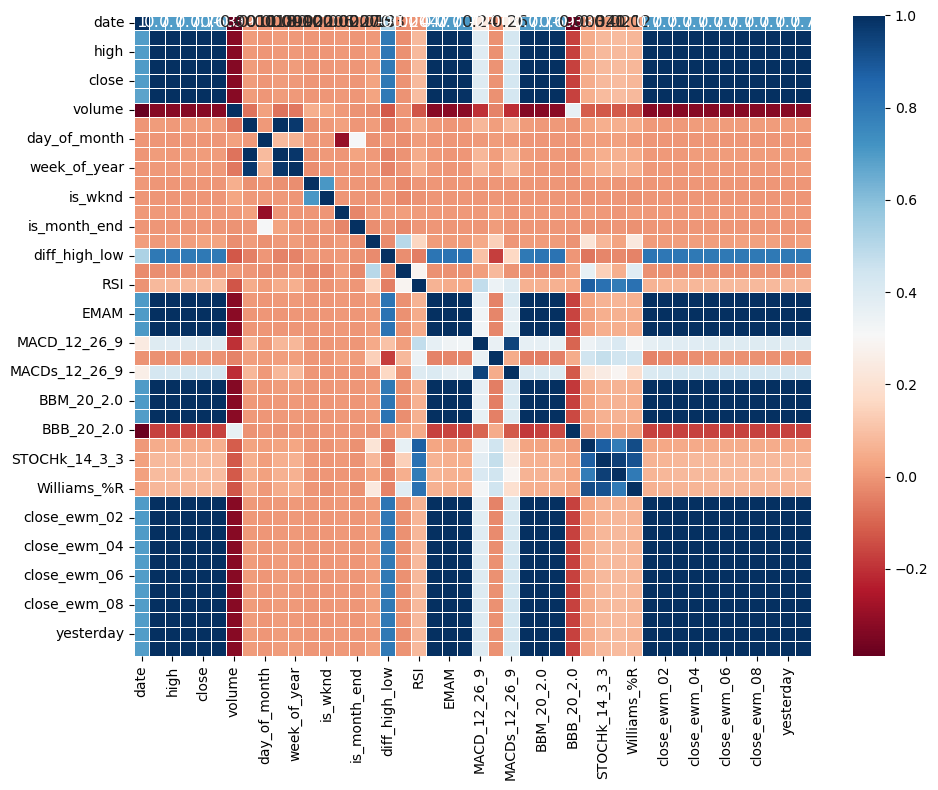

Low correlation features: ['month', 'day_of_month', 'day_of_year', 'week_of_year', 'day_of_week', 'is_wknd', 'is_month_start', 'is_month_end', 'diff_close_open', 'open_close_perc_change', 'RSI', 'MACDh_12_26_9', 'BBP_20_2.0', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'Williams_%R']
Shape: 16


In [83]:
# VISUALIZE CORRELATION

def correlation_matrix(dataframe: pd.DataFrame, cols: list):
    """
    :param dataframe: pandas.Dataframe
    :param cols: list
    """
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.tight_layout()
    plt.show(block=True)

def high_correlated_cols(dataframe: pd.DataFrame, head=10):
    """
    :param dataframe: pandas.DataFrame
    :param head: int
        10
    :return: corr_cols
        list
    """
    corr_matrix = dataframe.corr().abs()
    corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                                   .astype(bool)).stack().sort_values(ascending=False)).head(head)
    return corr_cols

corr_matrix = dfs.corr()
low_corr_features = corr_matrix.index[abs(corr_matrix["tomorrow"]) < 0.1].tolist()
correlation_matrix(dfs, dfs.columns)
print(f"Low correlation features: {low_corr_features}\nShape: {len(low_corr_features)}")

In [84]:
# PREPARE DATAS FOR PYTORCH TENSORS

from sklearn.model_selection import train_test_split
X = dfs.drop(["adj close", "date", "tomorrow"], axis=1) # DROPPING UNNECESSARY FEATURES AND DEPENDENT VARIABLE
X = X.drop(low_corr_features, axis=1) # DROPPING LOW CORRELATED FEATURES
y = dfs["tomorrow"]
dates = dfs["date"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)#0.3
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.67, shuffle=False)#67

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7146, 25)
(589, 25)
(1198, 25)


In [85]:
# TURNING DATAS TO PYTORCH TENSORS

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim

def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values.astype(np.float32)).to(device)

print(get_device())
device = get_device()

X_train_tensored = df_to_tensor(X_train)
X_val_tensored = df_to_tensor(X_val)

y_train_tensored = df_to_tensor(y_train).unsqueeze(1)
y_val_tensored = df_to_tensor(y_val).unsqueeze(1)

X_test_tensored = df_to_tensor(X_test)
y_test_tensored = df_to_tensor(y_test).unsqueeze(1)

cuda:0


In [86]:
# MODEL DEFINITION CLASS

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True).to(device)
        self.linear = nn.Linear(hidden_dim, output_dim).to(device)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        lstm_out, _ = self.lstm(x, (h0, c0))
        out = self.linear(lstm_out[:, -1])
        return out, _
    
n_samples, n_features = X.shape
output_dim = 1

In [87]:
# EARLY STOPPING CLASS

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        """
        Args:
            patience (int): Kayıp belirli bir süre (patience) boyunca iyileşmezse erken durdurma işlemi yapılır.
            min_delta (float): Kayıptaki minimum değişiklik. Eğer kayıptaki değişim min_delta'dan küçükse, iyileşme olmamış kabul edilir.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [88]:
# HYPERPARAMETER OPTIMIZATION

import optuna as opt

def objective(trial:opt.Trial):
    early_stopping = EarlyStopping(patience=20, min_delta=0.001)
    suggest_batch_size = trial.suggest_int("batch_size",1, 512)
    train_loader = DataLoader(TensorDataset(X_train_tensored, y_train_tensored), batch_size=suggest_batch_size, shuffle=False)
    val_loader = DataLoader(TensorDataset(X_val_tensored, y_val_tensored), batch_size=suggest_batch_size, shuffle=False)

    suggest_layer_size = trial.suggest_int("hidden_layer_size", 1, 500)
    suggest_num_layers = trial.suggest_int("num_layers", 1, 2)
    model = LSTM(input_dim=n_features, hidden_dim=suggest_layer_size, num_layers=suggest_num_layers, output_dim=output_dim)

    suggest_lr = trial.suggest_float("lr", 0.000001, 0.1, log=True) 
    optimizer = optim.Adam(params=model.parameters(), lr=suggest_lr)
    loss_function = nn.MSELoss().to(device)

    train_losses = []
    val_losses = []
    epoch = trial.suggest_int("epoch", 1, 100)
    for ep in range(1, epoch+1):
        model.train()
        tr_loss_t = 0
        num_train_samples = 0
        # Training
        for i, (X_batch, y_batch) in enumerate(train_loader):
            y_pred, _ = model(X_batch.unsqueeze(1))
            train_loss = torch.sqrt(loss_function(y_pred, y_batch))
            
            tr_loss_t += train_loss.item() * X_batch.size(0)
            num_train_samples += X_batch.size(0)
            
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

        # Evaluation
        model.eval()
        val_loss_t = 0
        num_val_samples = 0
        with torch.no_grad():
            for i, (X_batch, y_batch) in enumerate(val_loader):
                y_pred, _ = model(X_batch.unsqueeze(1))
                val_loss = torch.sqrt(loss_function(y_pred, y_batch))
                
                val_loss_t += val_loss.item() * X_batch.size(0)
                num_val_samples += X_batch.size(0)
        

        train_loss_result = tr_loss_t / num_train_samples
        train_losses.append(train_loss_result)

        val_loss_result = val_loss_t / num_val_samples
        val_losses.append(val_loss_result)

        # Report intermediate objective value.
        trial.report(val_loss_result, ep)
        # Prune trial if needed.
        if trial.should_prune():
            raise opt.exceptions.TrialPruned()
        
        if ep % 25 == 0:
            print(f"epoch: {ep}/{epoch}, Train Loss: {train_loss_result}, Val Loss: {val_loss_result}")

        early_stopping(val_loss_result)
        if early_stopping.early_stop:
            print("Early Stopping Worked!")
            print("We are at epoch:", ep)
            print(f"Loss: {train_loss_result}, Validation Loss: {val_loss_result}")
            break


    return val_loss_result

In [89]:
# EXPERIMENT WITH HYPERPARAMETERS AND OPTIMIZATION RESULTS

study = opt.create_study(storage="sqlite:///optuna.sqlite", direction="minimize", study_name="msft_corr_clipped_es20_notshuffled", load_if_exists=True)
#msft_corr_clipped_es20: 0.17 *
#msft_corr_clipped_esnone6: 0.17
#msft_corr_clipped_es20_2575: 0.12

#msft_alotof_variables_es20: 0.08 *
#msft_alotof_variables_es20_2575: 0.26

[I 2024-07-24 15:18:08,157] A new study created in RDB with name: msft_corr_clipped_es20_notshuffled


In [90]:
# STARTING OPTIMIZATION

study.optimize(objective, n_trials=1000, show_progress_bar=True, n_jobs=3)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 25/78, Train Loss: 0.0053690086715648, Val Loss: 0.006813869879585778
Early Stopping Worked!
We are at epoch: 22
Loss: 0.3055914689902333, Validation Loss: 0.20533741261740493
[I 2024-07-24 15:18:37,779] Trial 1 finished with value: 0.20533741261740493 and parameters: {'batch_size': 182, 'hidden_layer_size': 471, 'num_layers': 2, 'lr': 0.08647288841684832, 'epoch': 24}. Best is trial 1 with value: 0.20533741261740493.
Early Stopping Worked!
We are at epoch: 23
Loss: 0.07627616928158036, Validation Loss: 0.04815702608522464
Early Stopping Worked!
We are at epoch: 21
Loss: 0.07565262030433209, Validation Loss: 0.08108637750098174
[I 2024-07-24 15:18:48,770] Trial 3 finished with value: 0.08108637750098174 and parameters: {'batch_size': 367, 'hidden_layer_size': 485, 'num_layers': 1, 'lr': 0.0056883374681610515, 'epoch': 47}. Best is trial 3 with value: 0.08108637750098174.
[I 2024-07-24 15:18:49,080] Trial 0 finished with value: 0.04815702608522464 and parameters: {'batch_size': 5

In [91]:
# BEST PARAMS FOR OPTIMIZATION

study.best_params

{'batch_size': 42,
 'hidden_layer_size': 166,
 'num_layers': 1,
 'lr': 0.00014088079840765628,
 'epoch': 95}

In [92]:
# BEST LOSS VALUE
study.best_value

0.004808752758014182

In [94]:
# DATASET TO DATALOADER
batch_size = study.best_params['batch_size']
train_loader = DataLoader(TensorDataset(X_train_tensored, y_train_tensored), batch_size=batch_size, shuffle=False)
val_loader = DataLoader(TensorDataset(X_val_tensored, y_val_tensored), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensored, y_test_tensored), batch_size=batch_size, shuffle=False)

In [95]:
# DEFINE MODEL
hidden_layer_size = study.best_params['hidden_layer_size']
model = LSTM(input_dim=n_features, hidden_dim=hidden_layer_size, 
            num_layers=study.best_params['num_layers'],
            output_dim=output_dim)

In [96]:
# DEFINE OPTIMIZER AND LOSS FUNCTION
optimizer = optim.Adam(params=model.parameters(), 
                       lr=study.best_params['lr']
                       )
loss_function = nn.MSELoss().to(device)

train_losses = []
val_losses = []

In [97]:
# TRAIN MODEL WITH OPTIMIZATION

epoch = study.best_params['epoch']
early_stopping = EarlyStopping(patience=20, min_delta=0.001)
for ep in range(1, epoch+1):
    model.train()
    tr_loss_t = 0
    num_train_samples = 0
    # Training
    for i, (X_batch, y_batch) in enumerate(train_loader):
        y_pred, _ = model(X_batch.unsqueeze(1))
        train_loss = torch.sqrt(loss_function(y_pred, y_batch))
        
        tr_loss_t += train_loss.item() * X_batch.size(0)
        num_train_samples += X_batch.size(0)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        

    # Evaluation
    model.eval()
    val_loss_t = 0
    num_val_samples = 0
    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(val_loader):
            y_pred, _ = model(X_batch.unsqueeze(1))
            val_loss = torch.sqrt(loss_function(y_pred, y_batch))
            val_loss_t += val_loss.item() * X_batch.size(0)
            num_val_samples += X_batch.size(0)

    train_loss_result = tr_loss_t / num_train_samples
    train_losses.append(train_loss_result)

    val_loss_result = val_loss_t / num_val_samples
    val_losses.append(val_loss_result)
    if ep % 1 == 0:
        print(f"epoch: {ep}/{epoch}, Train Loss: {train_loss_result}, Val Loss: {val_loss_result}")
        
    early_stopping(val_loss_result)
    if early_stopping.early_stop:
        print("Early Stopping Worked!")
        print("We are at epoch:", ep)
        print(f"Loss: {train_loss_result}, Validation Loss: {val_loss_result}")
        break 

epoch: 1/95, Train Loss: 0.40619474599930816, Val Loss: 0.009132263486246706
epoch: 2/95, Train Loss: 0.010502297568661226, Val Loss: 0.008066571836244372
epoch: 3/95, Train Loss: 0.00921204950332823, Val Loss: 0.007301978027710536
epoch: 4/95, Train Loss: 0.007414327757855319, Val Loss: 0.008017186052521694
epoch: 5/95, Train Loss: 0.006286106109705157, Val Loss: 0.00593516520178657
epoch: 6/95, Train Loss: 0.004712665304197523, Val Loss: 0.005604449038967768
epoch: 7/95, Train Loss: 0.004271147539106054, Val Loss: 0.005523355374134862
epoch: 8/95, Train Loss: 0.0039684614740385605, Val Loss: 0.005523994462627835
epoch: 9/95, Train Loss: 0.003438138109614242, Val Loss: 0.005563442719031397
epoch: 10/95, Train Loss: 0.0036598968055534414, Val Loss: 0.005452830523508641
epoch: 11/95, Train Loss: 0.0034993302307026555, Val Loss: 0.0054053041770902475
epoch: 12/95, Train Loss: 0.0035539859303651148, Val Loss: 0.005332226621885175
epoch: 13/95, Train Loss: 0.0034967098903588524, Val Loss: 

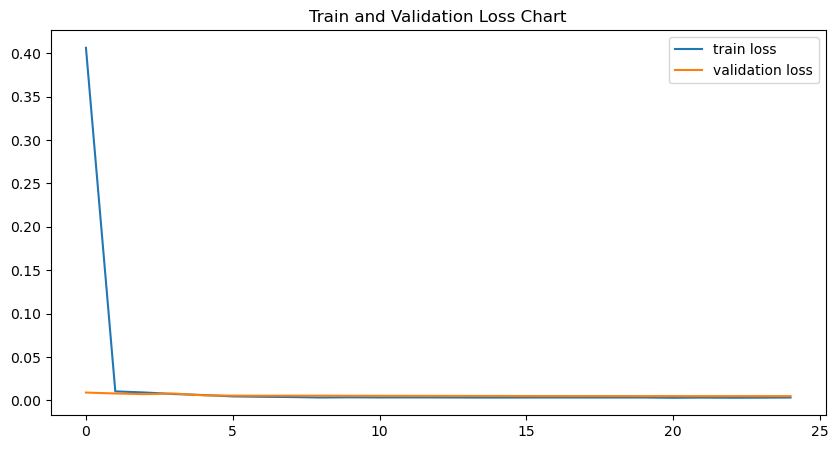

In [98]:
# LOSSES FOR EACH EPOCH
plt.figure(figsize=(10, 5))
sns.lineplot(y=train_losses, x=range(len(train_losses)), label='train loss')
sns.lineplot(y=val_losses, x=range(len(train_losses)), label='validation loss')
plt.title(f'Train and Validation Loss Chart')
plt.show()

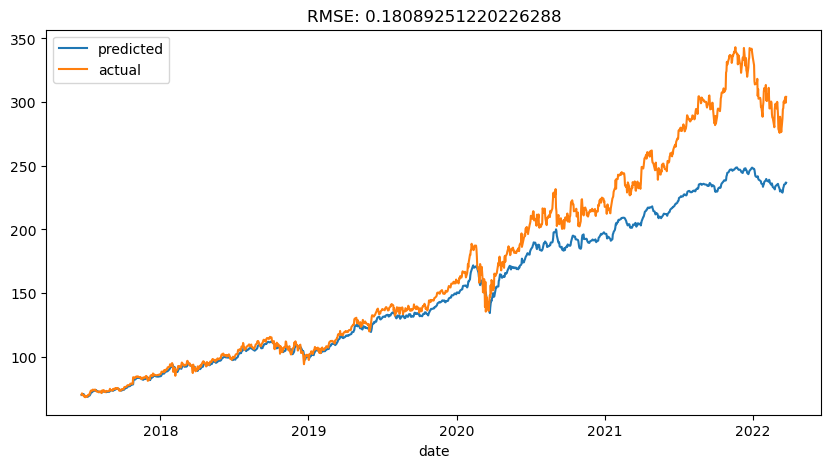

In [99]:
# TEST RESULTS
model.eval()
with torch.no_grad():
    y_pred, _ = model(X_test_tensored.unsqueeze(1))
    loss = torch.sqrt(loss_function(y_pred, y_test_tensored))

dates_test = dates.iloc[len(X_train_tensored)+len(X_val_tensored):]

y_pred_plt = scaler.inverse_transform(y_pred.cpu().numpy()).reshape(-1)
y_test_plt = scaler.inverse_transform(y_test_tensored.cpu().numpy()).reshape(-1)
plt.figure(figsize=(10, 5))
sns.lineplot(y=y_pred_plt, x=dates_test, label='predicted')
sns.lineplot(y=y_test_plt, x=dates_test, label='actual')
plt.title(f'RMSE: {loss.item()}')
plt.show()


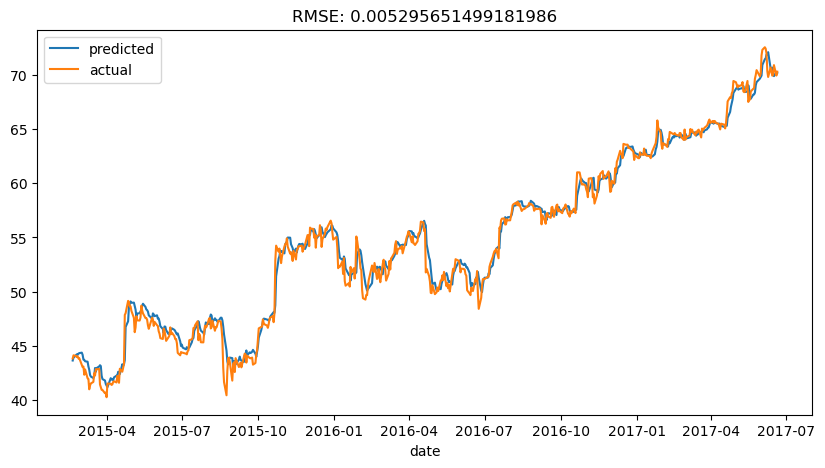

In [100]:
# VALIDATION RESULTS
model.eval()
with torch.no_grad():
    y_pred, _ = model(X_val_tensored.unsqueeze(1))
    loss = torch.sqrt(loss_function(y_pred, y_val_tensored))


dates_val = dates.iloc[len(X_train_tensored):len(X_train_tensored)+len(X_val_tensored)]
y_pred_plt = scaler.inverse_transform(y_pred.cpu().numpy()).reshape(-1)
y_val_plt = scaler.inverse_transform(y_val_tensored.cpu().numpy()).reshape(-1)
plt.figure(figsize=(10, 5))
sns.lineplot(y=y_pred_plt, x=dates_val, label='predicted')
sns.lineplot(y=y_val_plt, x=dates_val, label='actual')
plt.title(f'RMSE: {loss.item()}')
plt.show()

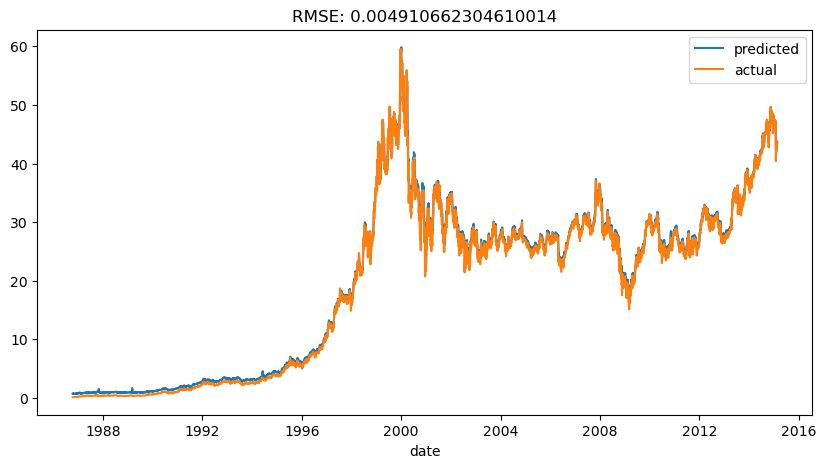

In [101]:
# TRAINING RESULTS
model.eval()
with torch.no_grad():
    y_pred, _ = model(X_train_tensored.unsqueeze(1))
    loss = torch.sqrt(loss_function(y_pred, y_train_tensored))

dates_train = dates.iloc[:len(X_train_tensored)]

y_pred_plt = scaler.inverse_transform(y_pred.cpu().numpy()).reshape(-1)
y_training_plt = scaler.inverse_transform(y_train_tensored.cpu().numpy()).reshape(-1)
plt.figure(figsize=(10, 5))
sns.lineplot(y=y_pred_plt, x=dates_train, label='predicted')
sns.lineplot(y=y_training_plt, x=dates_train, label='actual')
plt.title(f'RMSE: {loss.item()}')
plt.show()